In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import os




def evaluate_model(filepath, n_splits=5):
    print(f"\nRunning {n_splits}-fold cross validation on all models...")
    print("=" * 50)
    
    df = pd.read_csv(filepath)
    
    error_features = [
        'MgFe',
        '[M/H]_mean_mass', '[M/H]_err_mass',
        'velDisp_ppxf_res', 'velDisp_ppxf_err_res',
        'age_mean_mass', 'age_err_mass'
    ]
    
    error_rf = RandomForestRegressor(
        max_depth=22,       
        max_features=0.793,         
        max_samples=0.500,            
        min_samples_leaf=1,             
        min_samples_split=4,           
        n_estimators=460,                
        random_state=42                  
    )

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scaler = StandardScaler()
    
    results = {
        'Error Features RF': {'scores': [], 'features': error_features},
    }
    
    # Run k-fold validation for each model
    for fold, (train_idx, test_idx) in enumerate(kf.split(df), 1):
        print(f"\nFold {fold}/{n_splits}")
        print("-" * 30)
        
        for model_name, model_info in results.items():
            # Get data for this model
            X = df[model_info['features']]
            y = df['DoR']
            
            # Split data
            X_train = X.iloc[train_idx]
            X_test = X.iloc[test_idx]
            y_train = y.iloc[train_idx]
            y_test = y.iloc[test_idx]
            
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            model = error_rf

                
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            
            # Calculate and store R² score
            r2 = r2_score(y_test, y_pred)
            results[model_name]['scores'].append(r2)
            
            print(f"{model_name} - Fold {fold} R²: {r2:.4f}")
    
    # Print final results
    print("\nFinal Results")
    print("=" * 50)
    for model_name, model_info in results.items():
        scores = model_info['scores']
        mean_r2 = np.mean(scores)
        std_r2 = np.std(scores)
        print(f"\n{model_name}:")
        print(f"Mean R²: {mean_r2:.4f} (±{std_r2:.4f})")
        print(f"Individual fold scores: {[f'{score:.4f}' for score in scores]}")
    
    return results

# Run the analysis
filepath = '../data/E-INSPIRE_I_master_catalogue.csv'
output_path = '../data/cluster_results'
results = evaluate_model(filepath, n_splits=5)



Running 5-fold cross validation on all models...

Fold 1/5
------------------------------
Error Features RF - Fold 1 R²: 0.8085

Fold 2/5
------------------------------
Error Features RF - Fold 2 R²: 0.7963

Fold 3/5
------------------------------
Error Features RF - Fold 3 R²: 0.8008

Fold 4/5
------------------------------
Error Features RF - Fold 4 R²: 0.8124

Fold 5/5
------------------------------
Error Features RF - Fold 5 R²: 0.8323

Final Results

Error Features RF:
Mean R²: 0.8100 (±0.0125)
Individual fold scores: ['0.8085', '0.7963', '0.8008', '0.8124', '0.8323']



Analyzing threshold: 0.4

Fold 1/5
              precision    recall  f1-score   support

   DoR ≤ 0.4       0.95      0.95      0.95        22
   DoR > 0.4       0.98      0.98      0.98        64

    accuracy                           0.98        86
   macro avg       0.97      0.97      0.97        86
weighted avg       0.98      0.98      0.98        86


Fold 2/5
              precision    recall  f1-score   support

   DoR ≤ 0.4       0.86      0.82      0.84        22
   DoR > 0.4       0.94      0.95      0.95        64

    accuracy                           0.92        86
   macro avg       0.90      0.89      0.89        86
weighted avg       0.92      0.92      0.92        86


Fold 3/5
              precision    recall  f1-score   support

   DoR ≤ 0.4       1.00      0.78      0.88        23
   DoR > 0.4       0.93      1.00      0.96        63

    accuracy                           0.94        86
   macro avg       0.96      0.89      0.92        86
weighted avg      

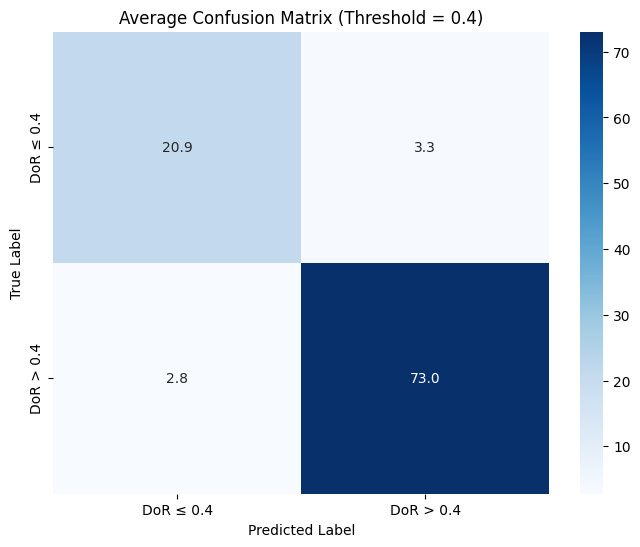


Analyzing threshold: 0.5

Fold 1/5
              precision    recall  f1-score   support

   DoR ≤ 0.5       0.82      0.85      0.84        39
   DoR > 0.5       0.87      0.85      0.86        47

    accuracy                           0.85        86
   macro avg       0.85      0.85      0.85        86
weighted avg       0.85      0.85      0.85        86


Fold 2/5
              precision    recall  f1-score   support

   DoR ≤ 0.5       0.84      0.88      0.86        42
   DoR > 0.5       0.88      0.84      0.86        44

    accuracy                           0.86        86
   macro avg       0.86      0.86      0.86        86
weighted avg       0.86      0.86      0.86        86


Fold 3/5
              precision    recall  f1-score   support

   DoR ≤ 0.5       0.84      0.86      0.85        42
   DoR > 0.5       0.86      0.84      0.85        44

    accuracy                           0.85        86
   macro avg       0.85      0.85      0.85        86
weighted avg      

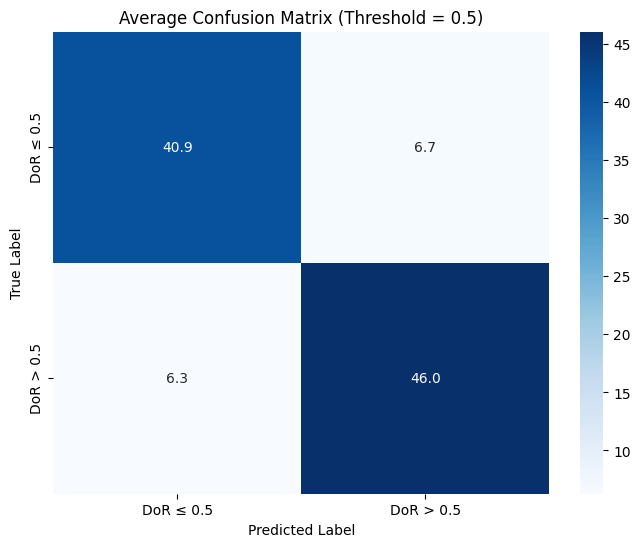


Analyzing threshold: 0.55

Fold 1/5
              precision    recall  f1-score   support

  DoR ≤ 0.55       0.87      0.95      0.91        56
  DoR > 0.55       0.88      0.73      0.80        30

    accuracy                           0.87        86
   macro avg       0.87      0.84      0.85        86
weighted avg       0.87      0.87      0.87        86


Fold 2/5
              precision    recall  f1-score   support

  DoR ≤ 0.55       0.92      0.90      0.91        63
  DoR > 0.55       0.75      0.78      0.77        23

    accuracy                           0.87        86
   macro avg       0.83      0.84      0.84        86
weighted avg       0.87      0.87      0.87        86


Fold 3/5
              precision    recall  f1-score   support

  DoR ≤ 0.55       0.88      0.93      0.90        56
  DoR > 0.55       0.85      0.77      0.81        30

    accuracy                           0.87        86
   macro avg       0.87      0.85      0.86        86
weighted avg     

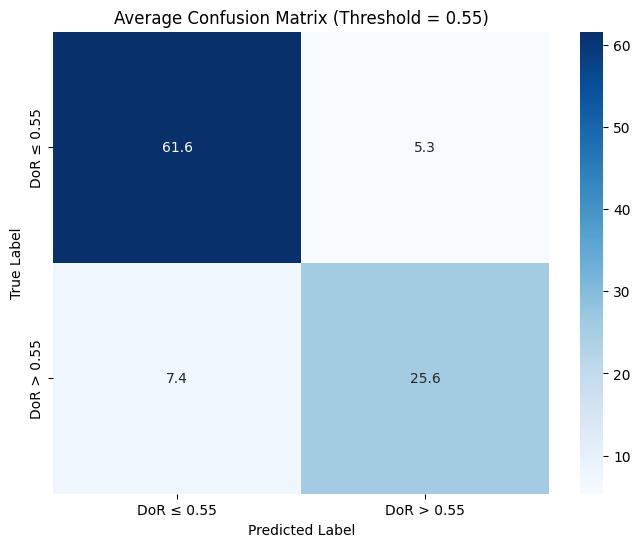


Analyzing threshold: 0.6

Fold 1/5
              precision    recall  f1-score   support

   DoR ≤ 0.6       0.90      0.95      0.93        66
   DoR > 0.6       0.81      0.65      0.72        20

    accuracy                           0.88        86
   macro avg       0.86      0.80      0.82        86
weighted avg       0.88      0.88      0.88        86


Fold 2/5
              precision    recall  f1-score   support

   DoR ≤ 0.6       0.96      0.99      0.97        72
   DoR > 0.6       0.92      0.79      0.85        14

    accuracy                           0.95        86
   macro avg       0.94      0.89      0.91        86
weighted avg       0.95      0.95      0.95        86


Fold 3/5
              precision    recall  f1-score   support

   DoR ≤ 0.6       0.97      0.93      0.95        69
   DoR > 0.6       0.75      0.88      0.81        17

    accuracy                           0.92        86
   macro avg       0.86      0.90      0.88        86
weighted avg      

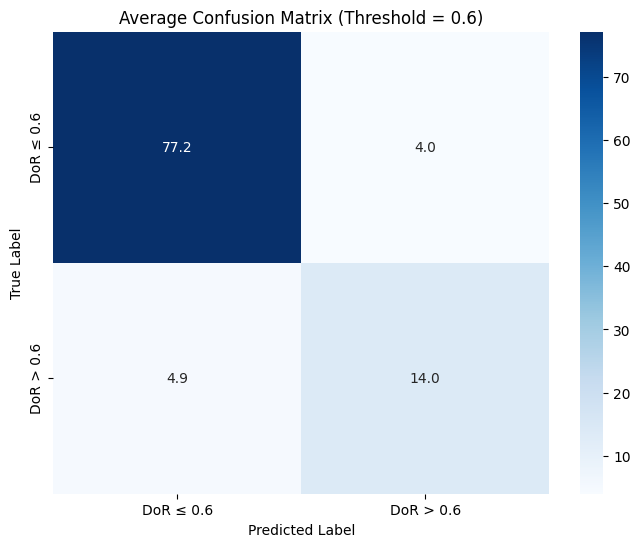

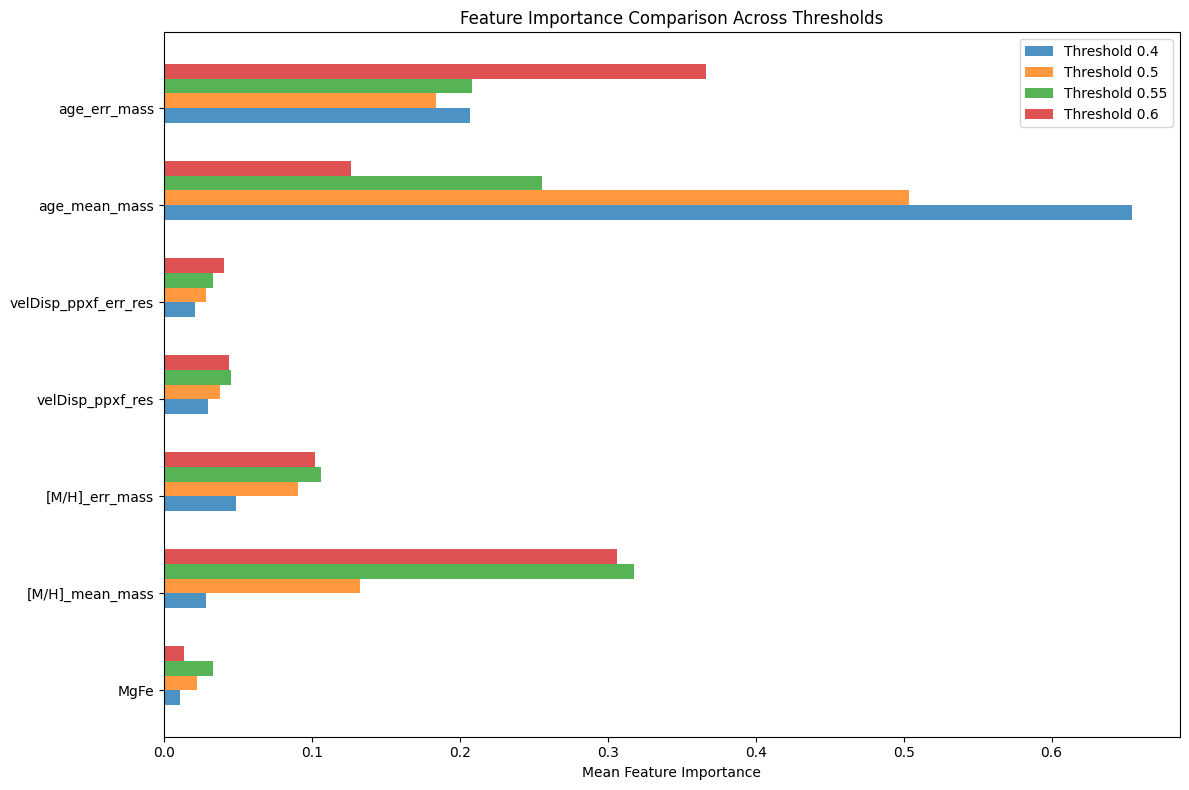

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve
)


def evaluate_classification_model(df, thresholds, n_splits=5):
    """Run classification analysis with k-fold cross validation for multiple thresholds"""
    features = [
        'MgFe',
        '[M/H]_mean_mass', '[M/H]_err_mass',
        'velDisp_ppxf_res', 'velDisp_ppxf_err_res',
        'age_mean_mass', 'age_err_mass'
    ]

    # Dictionary to store results for each threshold
    all_results = {}

    for threshold in thresholds:
        print(f"\nAnalyzing threshold: {threshold}")
        print("=" * 50)

        # Initialize classifier
        classifier = RandomForestClassifier(
            max_depth=22,
            max_features=0.793,
            max_samples=0.500,
            min_samples_leaf=1,
            min_samples_split=4,
            n_estimators=460,
            random_state=42
        )

        kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
        scaler = StandardScaler()

        # Initialize results storage
        results = {
            'accuracies': [],
            'confusion_matrices': [],
            'classification_reports': [],
            'feature_importance': []
        }

        # Prepare data
        X = df[features]
        y = (df['DoR'] > threshold).astype(int)
        class_names = [f'DoR ≤ {threshold}', f'DoR > {threshold}']

        # Run k-fold validation
        for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
            # Split and scale data
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            # Train and predict
            classifier.fit(X_train_scaled, y_train)
            y_pred = classifier.predict(X_test_scaled)
            y_pred_proba = classifier.predict_proba(X_test_scaled)[:, 1]

            # Store results
            results['accuracies'].append(accuracy_score(y_test, y_pred))
            results['confusion_matrices'].append(confusion_matrix(y_test, y_pred))
            results['classification_reports'].append(
                classification_report(y_test, y_pred, target_names=class_names)
            )
            results['feature_importance'].append(
                dict(zip(features, classifier.feature_importances_))
            )

            print(f"\nFold {fold}/{n_splits}")
            print(results['classification_reports'][-1])




        # Plot confusion matrix for this threshold
        avg_cm = np.mean(results['confusion_matrices'], axis=0) / (0.2 * len(df)) * 100
        plt.figure(figsize=(8, 6))
        sns.heatmap(
            avg_cm,
            annot=True,
            fmt='.1f',
            cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names
        )
        plt.title(f'Average Confusion Matrix (Threshold = {threshold})')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

        all_results[threshold] = results




    # Create combined feature importance plot
    plt.figure(figsize=(12, 8))

    # Calculate mean importance for each threshold
    importance_data = []
    for threshold, results in all_results.items():
        mean_importance = pd.DataFrame(results['feature_importance']).mean()
        importance_data.append(pd.Series(mean_importance, name=f'Threshold {threshold}'))

    importance_df = pd.concat(importance_data, axis=1)

    bar_width = 0.6/len(thresholds)
    positions = np.arange(len(features))

    for i, (threshold, column) in enumerate(importance_df.items()):
        plt.barh(positions + i * bar_width, column,
                 bar_width, label=threshold, alpha=0.8)

    plt.yticks(positions + bar_width / 2, features)
    plt.xlabel('Mean Feature Importance')
    plt.title('Feature Importance Comparison Across Thresholds')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    
    

    return all_results


# Load data and run analysis
filepath = '../data/E-INSPIRE_I_master_catalogue.csv'
df = pd.read_csv(filepath)

# Run analysis with multiple thresholds
thresholds = [0.4,0.5,0.55, 0.6]
results = evaluate_classification_model(df, thresholds, n_splits=5)